# Breast Cancer Classifier

In this project, we will be using several Python libraries to make a __K-Nearest Neighbor classifier__ that is trained to predict whether a patient has breast cancer.

## Explore the data

Let's begin by importing the breast cancer data from __sklearn.__ We want to import the function __load_breast_cancer__ from __sklearn.datasets.__

In [2]:
# Important imports
from sklearn.datasets import load_breast_cancer
%matplotlib inline

Once we've imported the dataset, let's load the data into a variable called __breast_cancer_data.__ Do this by setting breast_cancer_data equal to the function load_breast_cancer().

In [3]:
breast_cancer_data = load_breast_cancer()

Before jumping into creating our classifier, let's take a look at the data. Begin by printing __breast_cancer_data.data[0].__ That's the first datapoint in our set. 
But what do all of those numbers represent? Let's also print __breast_cancer_data.feature_names.__

In [5]:
breast_cancer_data.data[0]

array([1.799e+01, 1.038e+01, 1.228e+02, 1.001e+03, 1.184e-01, 2.776e-01,
       3.001e-01, 1.471e-01, 2.419e-01, 7.871e-02, 1.095e+00, 9.053e-01,
       8.589e+00, 1.534e+02, 6.399e-03, 4.904e-02, 5.373e-02, 1.587e-02,
       3.003e-02, 6.193e-03, 2.538e+01, 1.733e+01, 1.846e+02, 2.019e+03,
       1.622e-01, 6.656e-01, 7.119e-01, 2.654e-01, 4.601e-01, 1.189e-01])

In [6]:
breast_cancer_data.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')


We now have a sense of what the data looks like, but what are we trying to classify? Let's print both __breast_cancer_data.target__ and __breast_cancer_data.target_names.__

Was the very first data point tagged as __malignant or benign?__

In [8]:
breast_cancer_data.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [9]:
breast_cancer_data.target_names

array(['malignant', 'benign'], dtype='<U9')

## Splitting the data into Training and Validation Sets
We have our data, but now it needs to be split into training and validation sets. Luckily, sklearn has a function that does that for us. Begin by importing the __train_test_split__ function from __sklearn.model_selection.__

In [10]:
from sklearn.model_selection import train_test_split


Call the train_test_split function. It takes several parameters:

    . The data you want to split (for us breast_cancer_data.data)
    . The labels associated with that data (for us, breast_cancer_data.target).
    . The test_size. This is what percentage of your data you want to be in your testing set. Let's use test_size = 0.2
    . random_state. This will ensure that every time you run your code, the data is split in the same way. This can be any number. We used random_state = 100.

Right now we're not storing the return value of train_test_split. train_test_split returns four values in the following order:

    1.The training set
    2.The validation set
    3.The training labels
    4.The validation labels
Store those values in variables named __training_data, validation_data, training_labels, and validation_labels.__

In [11]:
training_data, validation_data, training_labels, validation_labels = train_test_split(
                                                                        breast_cancer_data.data,
                                                                        breast_cancer_data.target,
                                                                        test_size = 0.2,
                                                                        random_state = 100)

Let's confirm that worked correctly. Print out the length of __training_data and training_labels.__ They should be the same size - one label for every piece of data!

In [12]:
len(training_data)

455

In [13]:
len(training_labels)

455


## Running the classifier
Now that we've created training and validation sets, we can create a KNeighborsClassifier and test its accuracy. Begin by importing __KNeighborsClassifier__ from __sklearn.neighbors.__

In [14]:
from sklearn.neighbors import KNeighborsClassifier

Create a KNeighborsClassifier where n_neighbors = 3. Name the classifier classifier

In [16]:
classifier = KNeighborsClassifier(n_neighbors=3)

Train your classifier using the __fit function.__ This function takes two parameters: __the training set__ and __the training labels.__

In [17]:
classifier.fit(training_data, training_labels)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')

Now that the classifier has been trained, let's find how accurate it is on the validation set. Call the classifier's __score function.__ score takes two parameters: __the validation set__ and __the validation labels.__ Print the result!

In [18]:
classifier.score(validation_data, validation_labels)

0.9473684210526315

The classifier does pretty well when k = 3. But maybe there's a better k! Put the previous 3 lines of code inside a for loop. The loop should have a variable named k that starts at 1 and increases to 100. Rather than n_neighbors always being 3, it should be this new variable k.

You should now see 100 different validation accuracies print out. Which k seems the best?

In [21]:
for k in range(1, 101):
    classifier = KNeighborsClassifier(n_neighbors=k)
    classifier.fit(training_data, training_labels)
    print(classifier.score(validation_data, validation_labels))

0.9298245614035088
0.9385964912280702
0.9473684210526315
0.9473684210526315
0.9473684210526315
0.9473684210526315
0.9473684210526315
0.9473684210526315
0.956140350877193
0.956140350877193
0.956140350877193
0.956140350877193
0.956140350877193
0.956140350877193
0.956140350877193
0.956140350877193
0.956140350877193
0.956140350877193
0.956140350877193
0.956140350877193
0.956140350877193
0.956140350877193
0.9649122807017544
0.9649122807017544
0.956140350877193
0.956140350877193
0.956140350877193
0.956140350877193
0.9473684210526315
0.9473684210526315
0.9473684210526315
0.9473684210526315
0.9473684210526315
0.9473684210526315
0.9473684210526315
0.9473684210526315
0.956140350877193
0.956140350877193
0.956140350877193
0.956140350877193
0.956140350877193
0.956140350877193
0.956140350877193
0.9473684210526315
0.956140350877193
0.9473684210526315
0.956140350877193
0.956140350877193
0.956140350877193
0.956140350877193
0.9473684210526315
0.9473684210526315
0.9473684210526315
0.956140350877193
0.956

## Graphing the results
We now have the validation accuracy for 100 different ks. Rather than just printing it out, let's make a graph using matplotlib. Begin by importing matplotlib.pyplot as plt.

In [22]:
import matplotlib.pyplot as plt

The x-axis should be the values of k that we tested. This should be a list of numbers between 1 and 100. You can use the range function to make this list. Store it in a variable named __k_list.__

In [23]:
k_list = range(1, 101)

The y-axis of our graph should be the validation accuracy. Instead of printing the validation accuracies, we want to add them to a list. Outside of the for loop, create an empty list named accuracies. Inside the for loop, instead of printing each accuracy, append it to accuracies.

In [24]:
accuracies = []
for k in range(1, 101):
    classifier = KNeighborsClassifier(n_neighbors=k)
    classifier.fit(training_data, training_labels)
    accuracies.append(classifier.score(validation_data, validation_labels))

In [25]:
accuracies

[0.9298245614035088,
 0.9385964912280702,
 0.9473684210526315,
 0.9473684210526315,
 0.9473684210526315,
 0.9473684210526315,
 0.9473684210526315,
 0.9473684210526315,
 0.956140350877193,
 0.956140350877193,
 0.956140350877193,
 0.956140350877193,
 0.956140350877193,
 0.956140350877193,
 0.956140350877193,
 0.956140350877193,
 0.956140350877193,
 0.956140350877193,
 0.956140350877193,
 0.956140350877193,
 0.956140350877193,
 0.956140350877193,
 0.9649122807017544,
 0.9649122807017544,
 0.956140350877193,
 0.956140350877193,
 0.956140350877193,
 0.956140350877193,
 0.9473684210526315,
 0.9473684210526315,
 0.9473684210526315,
 0.9473684210526315,
 0.9473684210526315,
 0.9473684210526315,
 0.9473684210526315,
 0.9473684210526315,
 0.956140350877193,
 0.956140350877193,
 0.956140350877193,
 0.956140350877193,
 0.956140350877193,
 0.956140350877193,
 0.956140350877193,
 0.9473684210526315,
 0.956140350877193,
 0.9473684210526315,
 0.956140350877193,
 0.956140350877193,
 0.956140350877193,


We can now plot our data! Call plt.plot(). The first parameter should be k_list and the second parameter should be accuracies.

After plotting the graph, show it using plt.show().

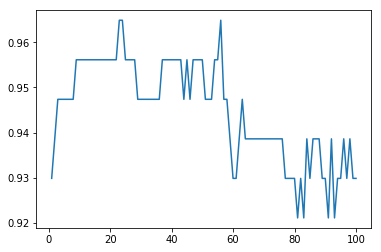

In [26]:
plt.plot(k_list, accuracies)
plt.show()

Let's add some labels and a title. Set the x-axis label to "k" using plt.xlabel(). Set the y-axis label to "Validation Accuracy". Set the title to "Breast Cancer Classifier Accuracy".

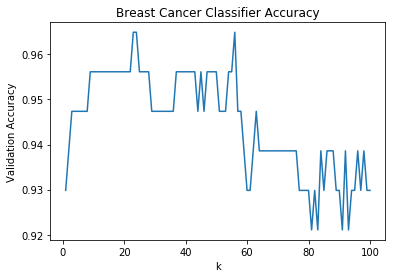

In [28]:
plt.plot(k_list, accuracies)
plt.xlabel("k")
plt.ylabel("Validation Accuracy")
plt.title("Breast Cancer Classifier Accuracy")
plt.show()

## Conclusion:
If we want to play around with this more, try changing the random_state parameter when making the training set and validation set. This will change which points are in the training set and which are in the validation set.

Ideally, the graph will look the same no matter how you split up the training set and test set. This data set is fairly small, so there is slightly more variance than usual.